In [2]:
import altair as alt
import pandas as pd
import numpy as np

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [11]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())


Checking for win32 chromedriver:2.45 in cache
There is no cached driver. Downloading new one...
Trying to download new driver from http://chromedriver.storage.googleapis.com/2.45/chromedriver_win32.zip
Unpack archive C:\Users\colin\.wdm\chromedriver\2.45\win32\chromedriver.zip


In [3]:
wine = pd.read_csv('./winemag-data_first150k.csv')

In [4]:
wine = wine.drop(['Unnamed: 0'], axis=1)

In [5]:
wine_sample1 = wine.sample(500)
wine_sample2 = wine.sample(500)
wine_sample3 = wine.sample(500)
wine_sample4 = wine.sample(500)
wine_oversample = wine.sample(4999)

In [6]:
pinot_noir = wine.loc[wine['variety'] == 'Pinot Noir']
cabernet = wine.loc[wine['variety'] == 'Cabernet Sauvignon']
chardonnay = wine.loc[wine['variety'] == 'Chardonnay']
riesling = wine.loc[wine['variety'] == 'Riesling']

In [7]:
pinot_noir_sample = pinot_noir.sample(500)
cabernet_sample = cabernet.sample(500)
chardonnay_sample = chardonnay.sample(500)
reisling_sample = riesling.sample(500)

In [8]:
wine_sample1.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
35774,US,"Easton's small-production Barbera is tight, sh...",Monarch Mine Vineyard,90,25.0,California,Sierra Foothills,Sierra Foothills,Barbera,Easton
149954,New Zealand,"Solid, mainstream Marlborough Sauvignon at an ...",NaN,87,13.0,Marlborough,NaN,NaN,Sauvignon Blanc,Oyster Bay
132472,Australia,Allegedly a step up from Shottesbrooke's regul...,Punch,86,39.0,South Australia,McLaren Vale,NaN,Cabernet Sauvignon,Shottesbrooke
78147,France,"A tightly tannic wine, with a firm feeling of ...",Château de Sabazan,88,25.0,Southwest France,Saint-Mont,NaN,Red Blend,Producteurs Plaimont
112051,Italy,"The most noticeable aroma is marzipan, which a...",Brut,87,11.0,Veneto,Prosecco di Valdobbiadene,NaN,Prosecco,Mionetto


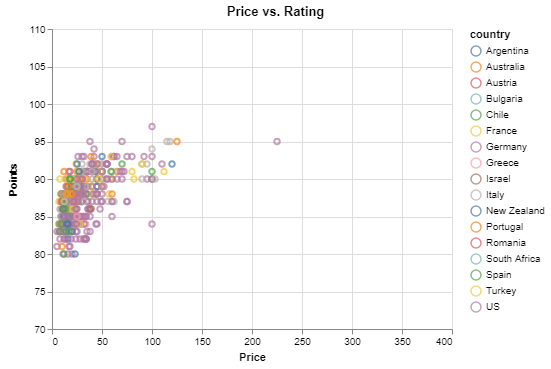

In [9]:
alt.Chart(wine_sample1).mark_point().encode(
    alt.X('price', title = "Price", scale = alt.Scale(domain=[0, 400])),
    alt.Y('points', title = "Points", scale = alt.Scale(domain=[75, 105])),
    color='country:N',
    tooltip = ('variety', 'winery')
).properties(title='Price vs. Rating'
).interactive()

In [13]:
oversample = alt.Chart(wine_oversample).mark_point().encode(
    alt.X('price', title = "Price", scale = alt.Scale(domain=[0, 400])),
    alt.Y('points', title = "Points", scale = alt.Scale(domain=[75, 105])),
    color='country:N',
    tooltip = ('variety', 'winery')
).properties(title='Price vs. Rating'
).interactive()

oversample
oversample.save("oversample.png")

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


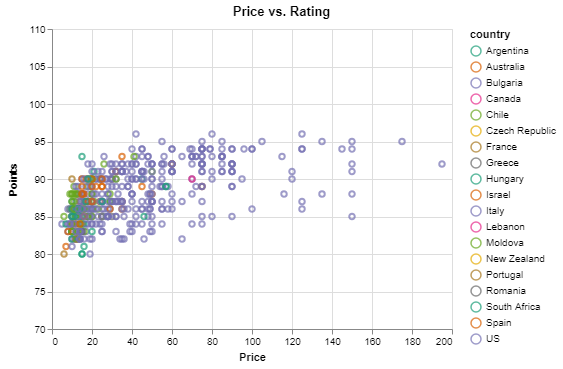

In [15]:
alt.Chart(cabernet_sample).mark_point().encode(
    alt.X('price', title = "Price", scale = alt.Scale(domain=[0, 200])),
    alt.Y('points', title = "Points", scale = alt.Scale(domain=[75, 105])),
    color=alt.Color('country', scale=alt.Scale(scheme='dark2')),
    tooltip = ('variety')    
).properties(title='Price vs. Rating'
).interactive()

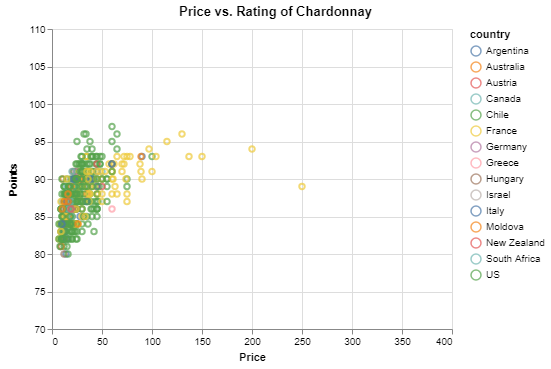

In [16]:
alt.Chart(chardonnay_sample).mark_point().encode(
    alt.X('price', title = "Price", scale = alt.Scale(domain=[0, 400])),
    alt.Y('points', title = "Points", scale = alt.Scale(domain=[75, 105])),
    color='country:N',
    tooltip = ('winery')
).properties(title='Price vs. Rating of Chardonnay'
).interactive()


https://medium.com/@colinlounsbury/the-joys-of-altair-in-python-a67ae874211f